In [1]:
import itertools as it
import logging
import random

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import seaborn as sns
from tqdm import tqdm

from hsurf.hsurf import tilted_algo as tilted_algo
from hsurf import site_selection_strategy
import pylib

random.seed(1)

logging.basicConfig(
    format="[%(funcName)s:%(lineno)d] %(message)s",
)
logger = logging.getLogger()

pylib.jupyter_hide_toggle(hide=True)


/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_check_testing_requirements.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pandera/__init__.py:40: UserWarning: Pandas and numpy have been removed from the base pandera
dependencies. Please install pandas as part of your environment's
dependencies or install the pandas extra with:

```bash
pip install pandas pandera

# or
pip install 'pandera[pandas]'
```

  warnings.warn(_warning_msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/alifedata_phyloinformatics_convert/_impl/phytrack_Systematcs.py:7: UserWarning: ImportWarning: phylotrackpy.Systematics import failed; inserting a no-op mock for Systematics. This is likely because phylotrackpy is not installed.
  w

<IPython.core.display.Javascript object>

In [2]:
nbm.print_metadata()

pylib.jupyter_hide_toggle(hide=True)


context: ci
hostname: fv-az2250-88
interpreter: 3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]
nbcellexec: null
nbname: 20a-tilted-eulerian-surface
nbpath: /home/runner/work/hstrat-surface-concept/hstrat-surface-concept/binder/20a-tilted-eulerian-surface.ipynb
revision: null
session: 0d7e74bf-d796-47b8-aa15-62cfe5343f8d
timestamp: 2025-07-05T22:44:46Z00:00


IPython==7.31.1
keyname==0.6.0
yaml==6.0.2
hsurf==1.0.2
logging==0.5.1.2
matplotlib==3.8.3
nbmetalog==0.2.6
numpy==1.23.5
seaborn==0.13.2
re==2.2.1
comm==0.2.2
psutil==7.0.0
zmq==27.0.0
json==2.0.9
ipykernel==6.29.5


<IPython.core.display.Javascript object>

100%|██████████| 255/255 [00:00<00:00, 50699.07it/s]


teeplots/20a/surface-size=8+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/surface-size=8+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


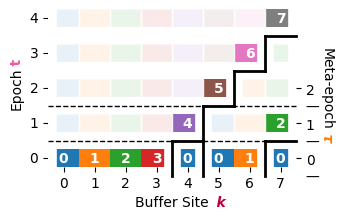

100%|██████████| 255/255 [00:00<00:00, 52239.30it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=8+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=8+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


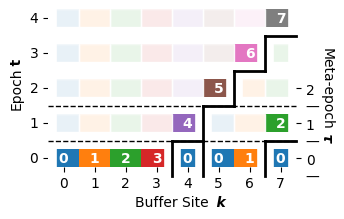

100%|██████████| 255/255 [00:00<00:00, 64179.27it/s]


teeplots/20a/surface-size=8+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/surface-size=8+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


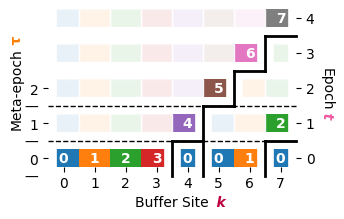

100%|██████████| 255/255 [00:00<00:00, 64287.28it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=8+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=8+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


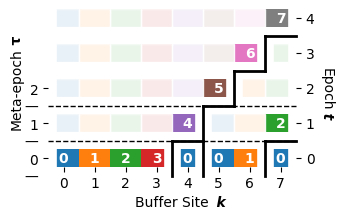

100%|██████████| 65535/65535 [00:01<00:00, 60159.18it/s]


teeplots/20a/surface-size=16+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/surface-size=16+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


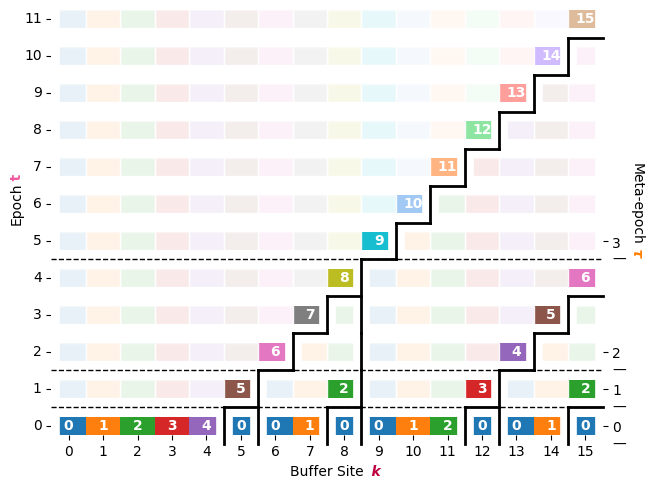

100%|██████████| 65535/65535 [00:01<00:00, 60475.87it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=16+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=16+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


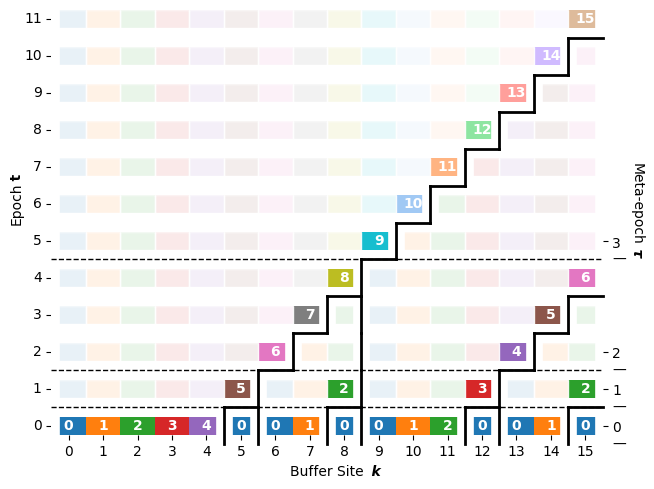

100%|██████████| 65535/65535 [00:01<00:00, 60138.85it/s]


teeplots/20a/surface-size=16+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/surface-size=16+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


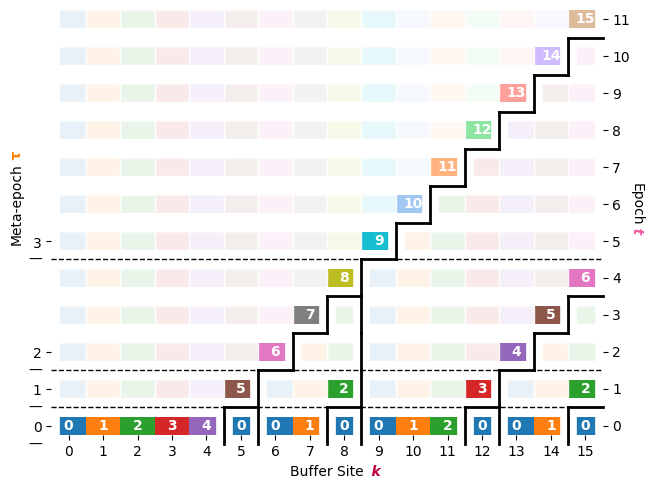

100%|██████████| 65535/65535 [00:01<00:00, 59815.86it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=16+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=16+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


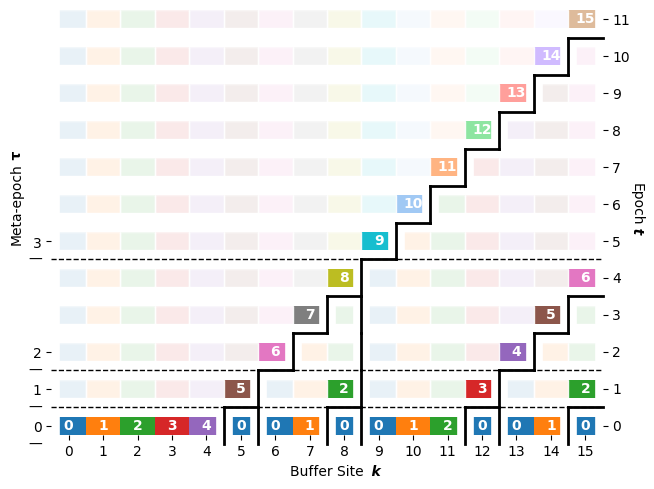

100%|██████████| 262144/262144 [00:06<00:00, 41862.20it/s]


teeplots/20a/surface-size=32+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/surface-size=32+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


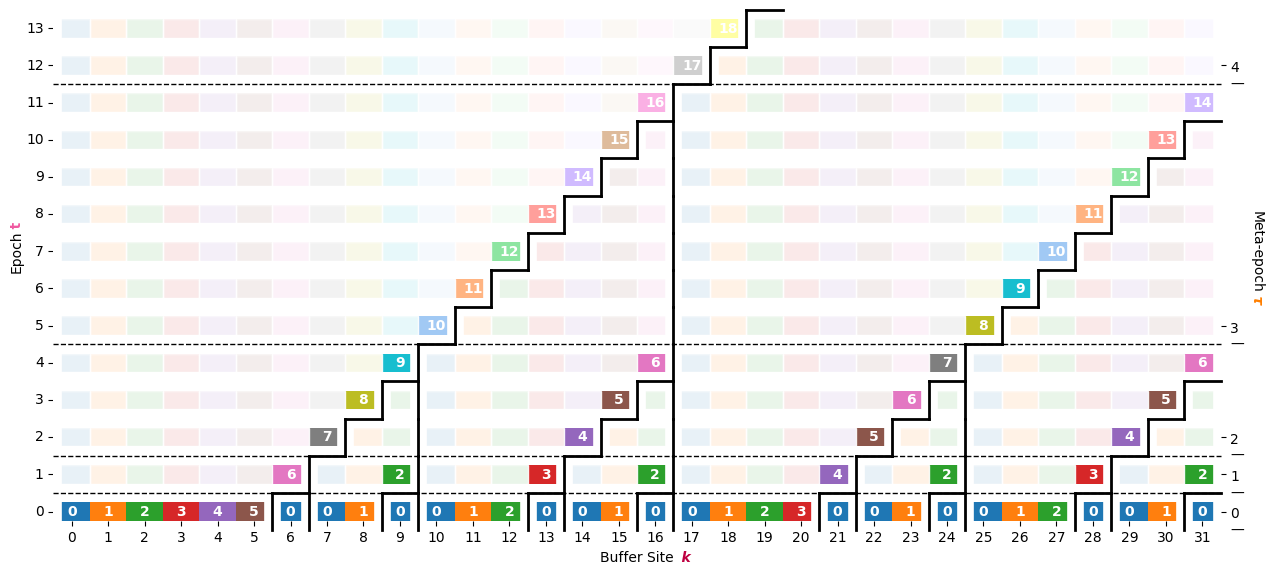

100%|██████████| 262144/262144 [00:06<00:00, 42270.59it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=32+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=32+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


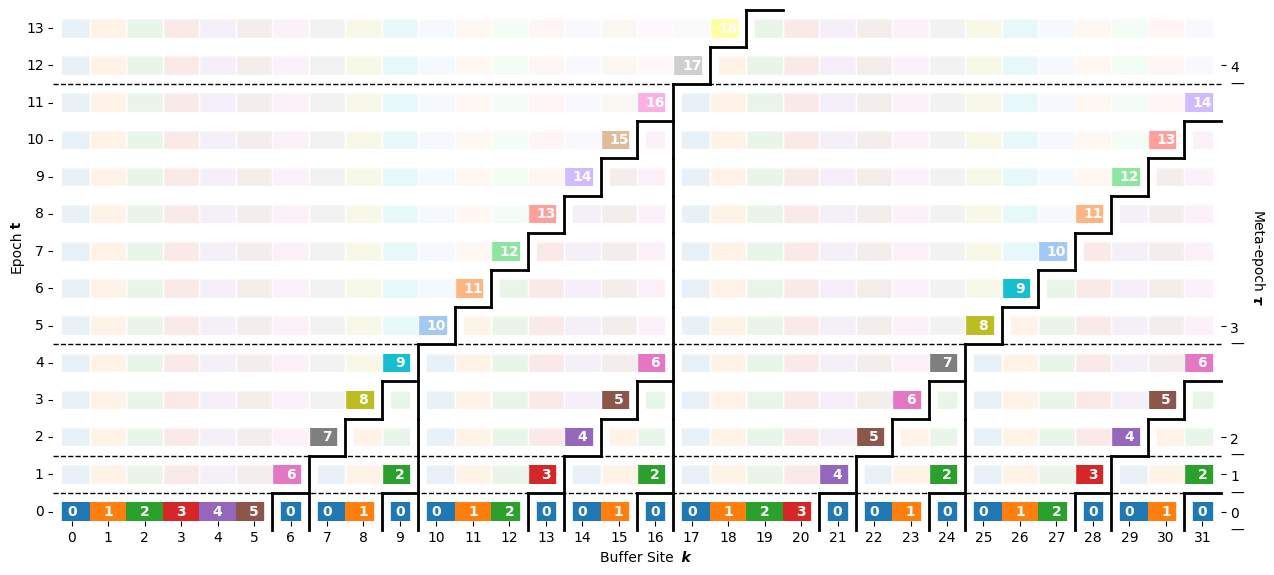

100%|██████████| 262144/262144 [00:06<00:00, 42481.75it/s]


teeplots/20a/surface-size=32+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/surface-size=32+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


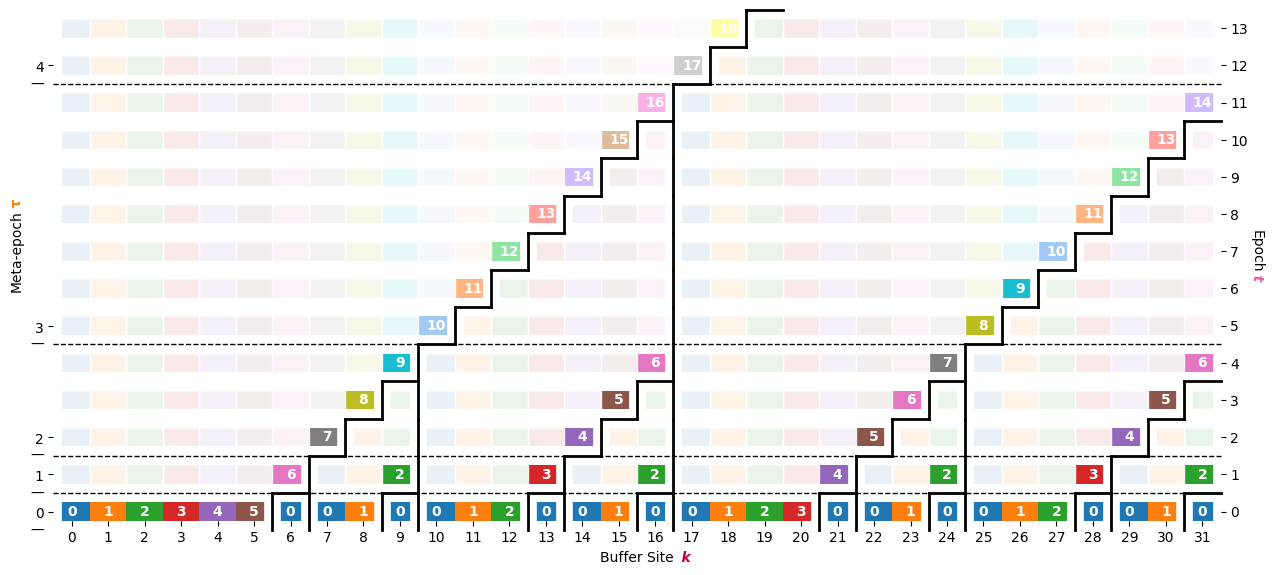

100%|██████████| 262144/262144 [00:06<00:00, 42207.07it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=32+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+surface-size=32+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


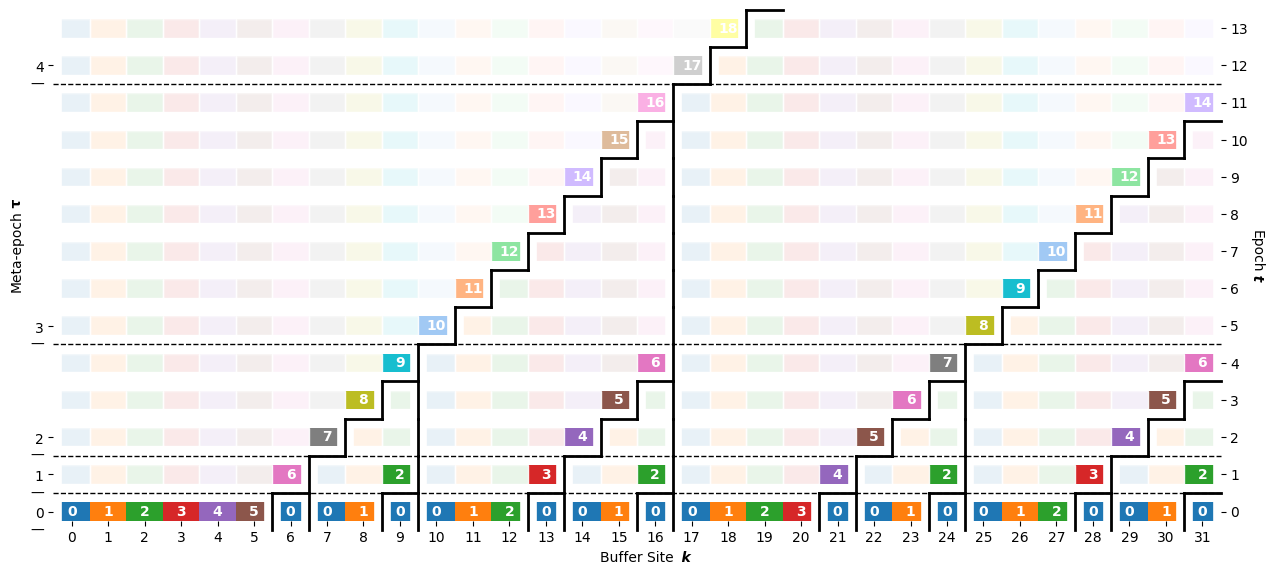

In [3]:
for surface_size, swap_yaxes, symbol_color in it.product(
    [8, 16, 32], [False, True], [None, "black"]
):
    surface_history_df = pylib.site_selection_eval.make_surface_history_df(
        tilted_algo.pick_ingest_site,
        surface_size=surface_size,
        num_generations=min(2**18, tilted_algo.get_ingest_capacity(surface_size)),
        progress_wrap=tqdm,
    ).replace(-1, np.nan)

    candidate_ranks = [
        2**i - 1 for i in range(surface_size.bit_length() - 1, surface_size)
    ]
    maxrank = surface_history_df["rank"].max()
    ranks = [
        rank
        for rank in candidate_ranks
        if rank <= maxrank  # in operator weird, nan?
    ]
    pylib.tee_release(
        pylib.site_selection_viz.site_reservation_at_ranks_heatmap,
        surface_history_df,
        ranks=ranks,
        color_epoch_t=symbol_color,
        color_metaepoch_tau=symbol_color,
        color_site_k=symbol_color,
        plotter_=pylib.site_selection_viz.site_reservation_at_rank_stripped_heatmap,
        swap_yaxes=swap_yaxes,
        teeplot_outattrs={
            "surface-size": surface_size,
            "swap-yaxes": swap_yaxes,
            "symbol-color": symbol_color,
        },
        teeplot_subdir="20a",
    )
    plt.show()


In [4]:
def clear_ax(
    *_args,
    **kwargs,
) -> mpl.axes.Axes:
    kwargs["palette"] = ["white"] * 20
    kwargs["zigwidth"] = 0.0
    kwargs["zigzag"] = False
    return pylib.site_selection_viz.site_reservation_at_rank_stripped_heatmap(
        *_args,
        **kwargs,
    )


100%|██████████| 255/255 [00:00<00:00, 64966.74it/s]


teeplots/20a/plotter=clear_ax+surface-size=8+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/plotter=clear_ax+surface-size=8+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


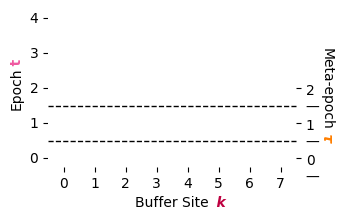

100%|██████████| 255/255 [00:00<00:00, 53794.77it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=8+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=8+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


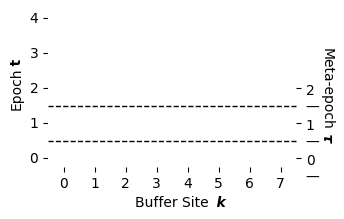

100%|██████████| 255/255 [00:00<00:00, 51859.36it/s]


teeplots/20a/plotter=clear_ax+surface-size=8+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/plotter=clear_ax+surface-size=8+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


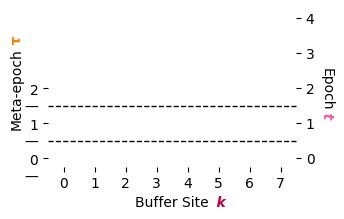

100%|██████████| 255/255 [00:00<00:00, 52162.87it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=8+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=8+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


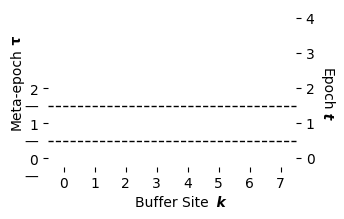

100%|██████████| 65535/65535 [00:01<00:00, 61763.41it/s]


teeplots/20a/plotter=clear_ax+surface-size=16+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/plotter=clear_ax+surface-size=16+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


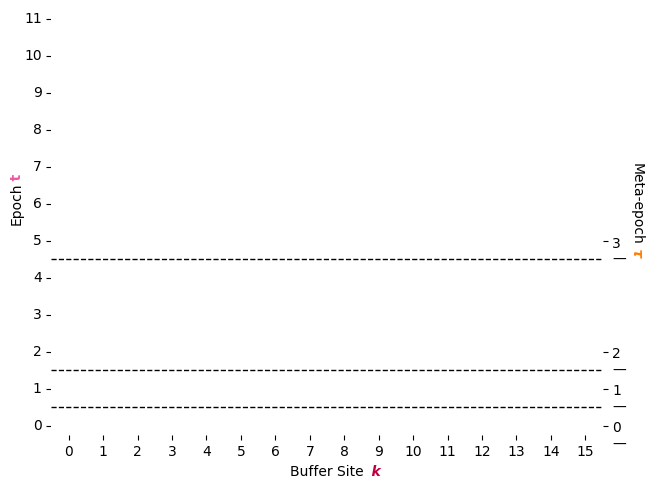

100%|██████████| 65535/65535 [00:01<00:00, 60555.43it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=16+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=16+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


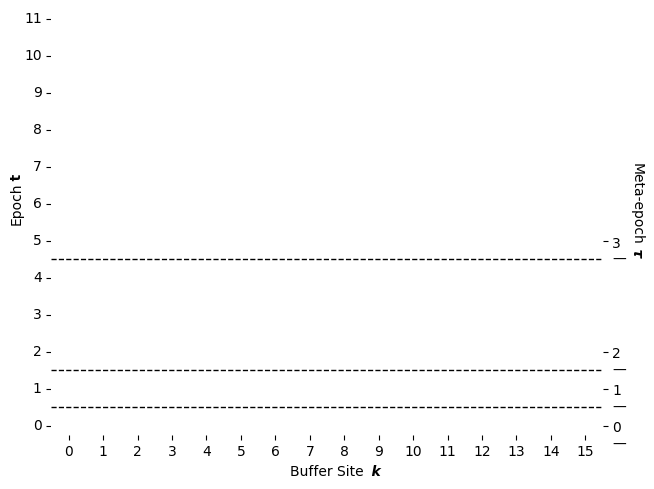

100%|██████████| 65535/65535 [00:01<00:00, 61913.63it/s]


teeplots/20a/plotter=clear_ax+surface-size=16+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/plotter=clear_ax+surface-size=16+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


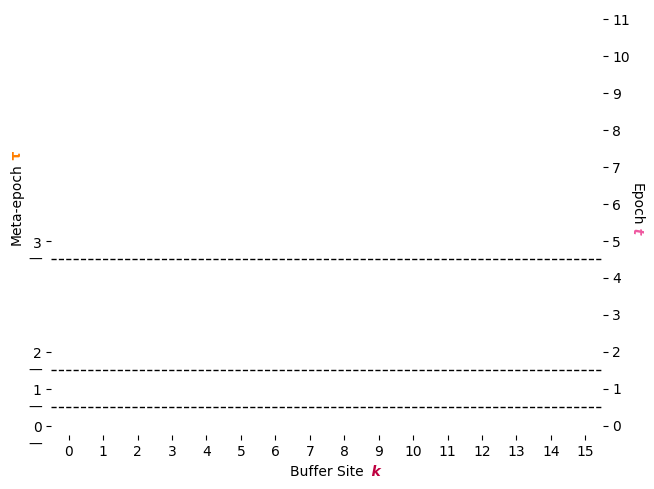

100%|██████████| 65535/65535 [00:01<00:00, 61158.35it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=16+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=16+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


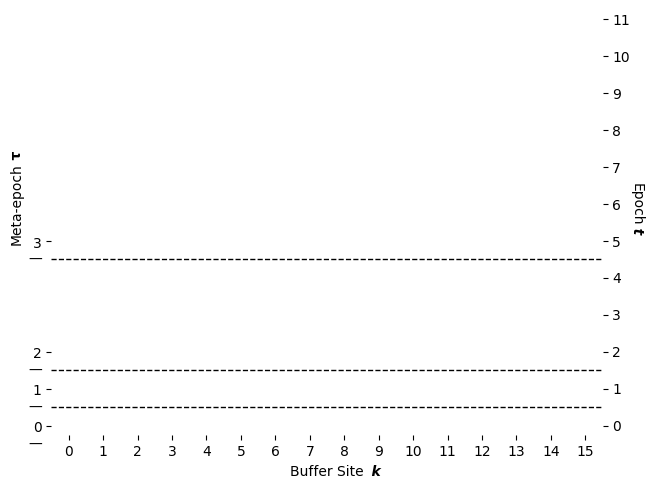

100%|██████████| 262144/262144 [00:06<00:00, 42211.80it/s]


teeplots/20a/plotter=clear_ax+surface-size=32+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/plotter=clear_ax+surface-size=32+swap-yaxes=False+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


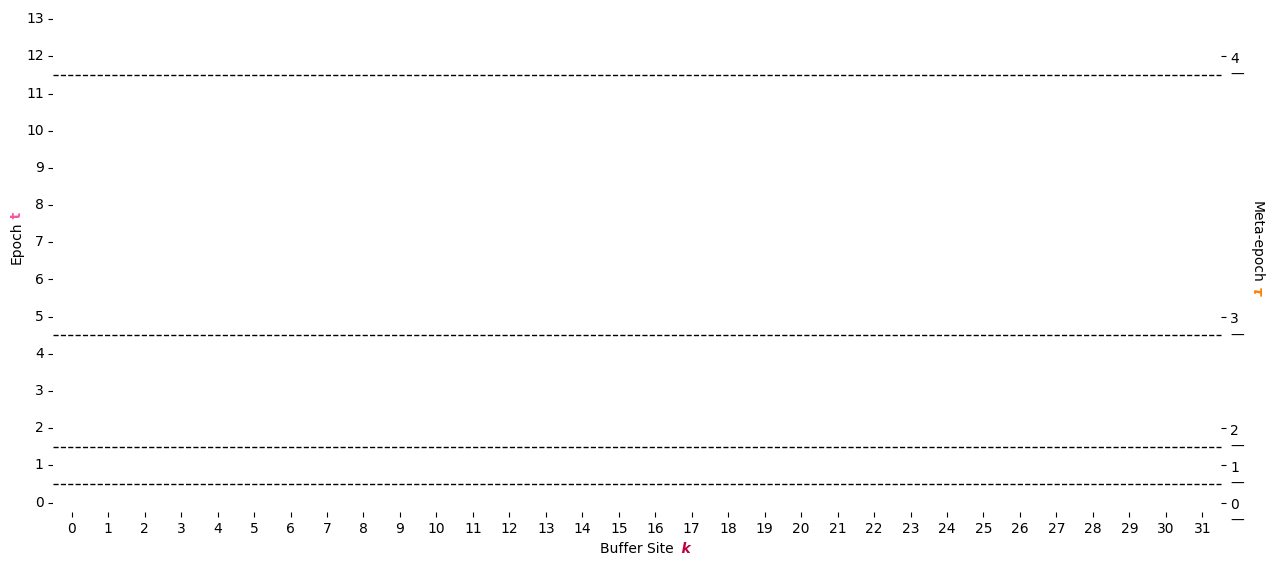

100%|██████████| 262144/262144 [00:06<00:00, 42591.63it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=32+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=32+swap-yaxes=False+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


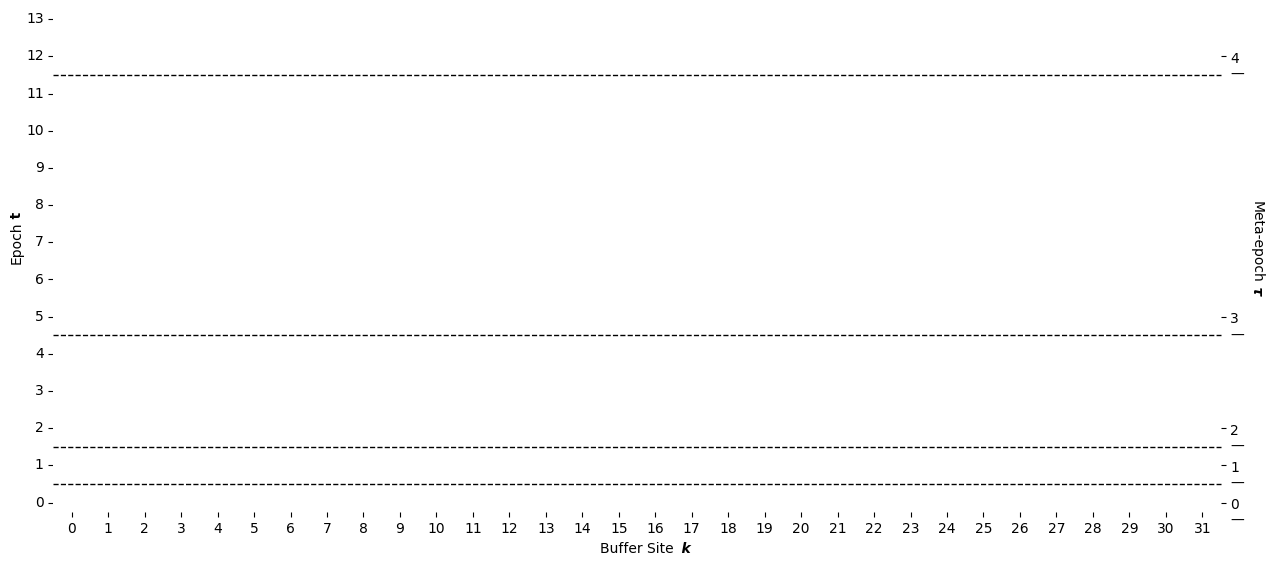

100%|██████████| 262144/262144 [00:06<00:00, 42647.93it/s]


teeplots/20a/plotter=clear_ax+surface-size=32+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/plotter=clear_ax+surface-size=32+swap-yaxes=True+symbol-color=None+viz=site-reservation-at-ranks-heatmap+ext=.png


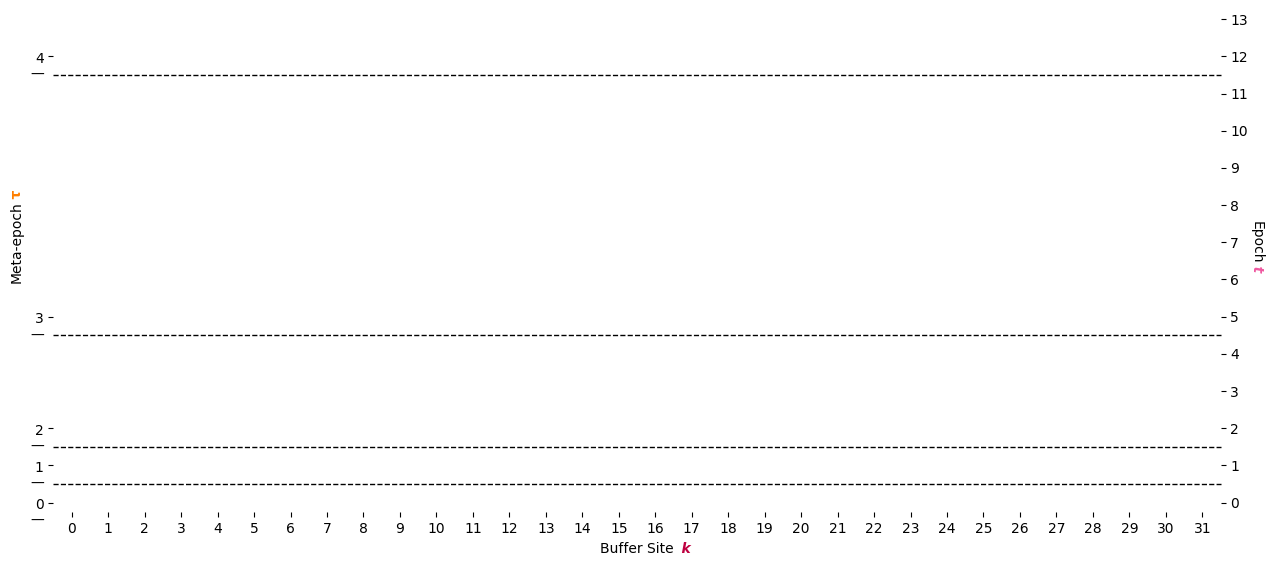

100%|██████████| 262144/262144 [00:06<00:00, 41875.08it/s]


teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=32+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.pdf
teeplots/20a/color-epoch-t=black+color-metaepoch-tau=black+color-site-k=black+plotter=clear_ax+surface-size=32+swap-yaxes=True+symbol-color=black+viz=site-reservation-at-ranks-heatmap+ext=.png


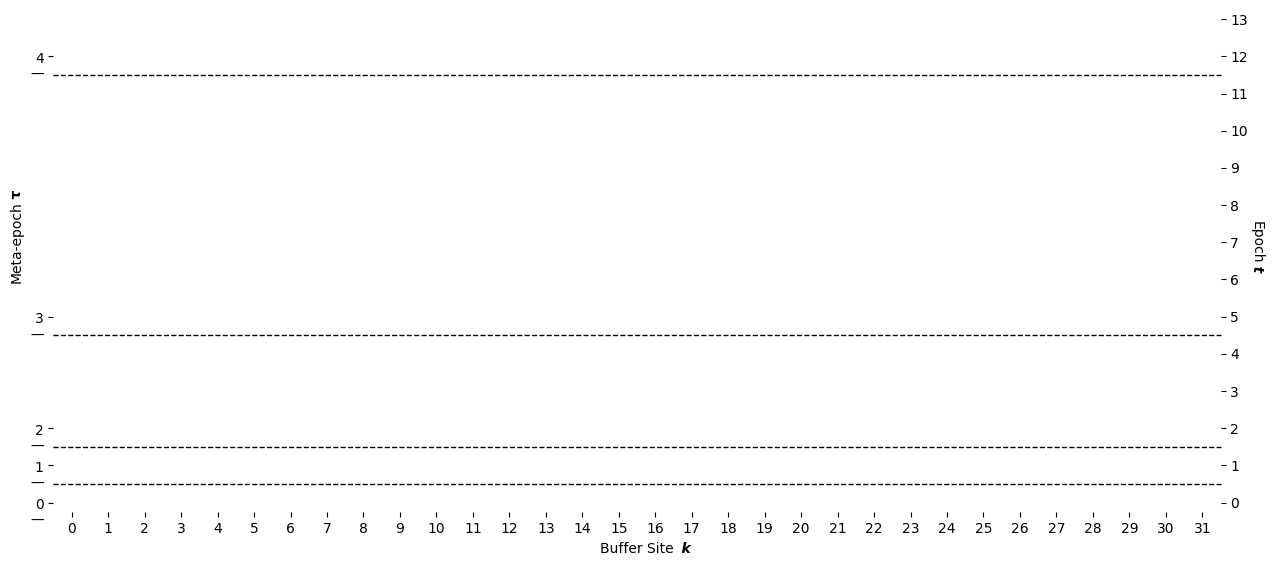

In [5]:
for surface_size, swap_yaxes, symbol_color in it.product(
    [8, 16, 32], [False, True], [None, "black"]
):
    surface_history_df = pylib.site_selection_eval.make_surface_history_df(
        tilted_algo.pick_ingest_site,
        surface_size=surface_size,
        num_generations=min(2**18, tilted_algo.get_ingest_capacity(surface_size)),
        progress_wrap=tqdm,
    ).replace(-1, np.nan)

    candidate_ranks = [
        2**i - 1 for i in range(surface_size.bit_length() - 1, surface_size)
    ]
    maxrank = surface_history_df["rank"].max()
    ranks = [
        rank
        for rank in candidate_ranks
        if rank <= maxrank  # in operator weird, nan?
    ]
    pylib.tee_release(
        pylib.site_selection_viz.site_reservation_at_ranks_heatmap,
        surface_history_df,
        ranks=ranks,
        plotter_=clear_ax,
        color_epoch_t=symbol_color,
        color_metaepoch_tau=symbol_color,
        color_site_k=symbol_color,
        swap_yaxes=swap_yaxes,
        teeplot_outattrs={
            "surface-size": surface_size,
            "swap-yaxes": swap_yaxes,
            "symbol-color": symbol_color,
            "plotter": "clear_ax"
        },
        teeplot_subdir="20a",
    )
    plt.show()


## Visualize Tilted Criterion Satisfaction


In [6]:
mpl.rcParams.update(
    {
        "figure.figsize": (6, 1.5),
        "font.family": "serif",
    },
)


100%|██████████| 255/255 [00:00<00:00, 5574.54it/s]


teeplots/20a/hue=kind+surface-size=8+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.pdf
teeplots/20a/hue=kind+surface-size=8+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.png


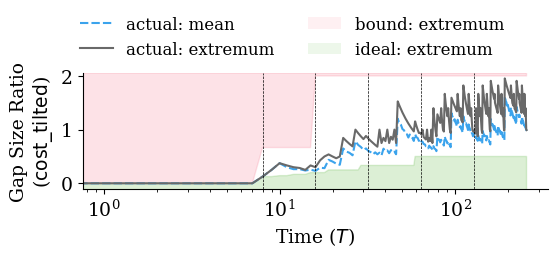

100%|██████████| 65535/65535 [00:11<00:00, 5643.50it/s]


teeplots/20a/hue=kind+surface-size=16+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.pdf
teeplots/20a/hue=kind+surface-size=16+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.png


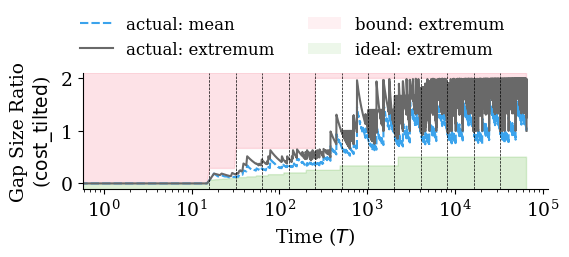

100%|██████████| 65536/65536 [00:11<00:00, 5515.50it/s]


teeplots/20a/hue=kind+surface-size=32+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.pdf
teeplots/20a/hue=kind+surface-size=32+viz=criterion-satisfaction-lineplot+x=rank+y=tilted-criterion+ext=.png


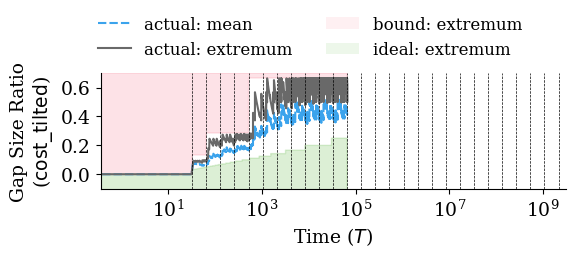

In [7]:
for surface_size in 8, 16, 32:
    surface_history_df = pylib.site_selection_eval.make_surface_history_df(
        tilted_algo.pick_ingest_site,
        surface_size=surface_size,
        num_generations=min(2**surface_size - 1, 2**16),
        progress_wrap=tqdm,
    )
    criteria_df = pylib.site_selection_eval.calc_surface_history_criteria(
        surface_history_df,
        tilted_algo,
        site_selection_strategy.site_selection_bounds,
        site_selection_strategy.site_selection_criteria,
        enforce_tilted_bound=True,
        progress_wrap=tqdm,
    )
    with pylib.teed_release(
        pylib.site_selection_viz.criterion_satisfaction_lineplot,
        data=criteria_df[
            ~criteria_df["kind"].isin(["naive lower bound"])
        ],
        x="rank",
        y="tilted criterion",
        hue="kind",
        surface_size=surface_size,
        teeplot_outinclude="surface_size",
        teeplot_subdir="20a",
    ) as ax:
        sns.move_legend(
            ax, "lower center",
            bbox_to_anchor=(.45, 1),
            ncol=2,
            title=None,
            frameon=False,
            fontsize="large",
        )
        ax.set_xlabel("Time ($T$)")
        ax.set_ylabel("Gap Size Ratio\n($\\mathsf{cost\_tilted}$)")
